In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [121]:
# Veriyi yükleme
file_path = "siniflandirilmis-veriler.csv"
veriler = pd.read_csv(file_path)

In [122]:
# Bedensel spor verilerini ayırma
bedensel_spor = veriler[["yas","zihinsporgun", "zihinsporsure", "zihinyoruculuk", "not", "derskatilim", "derszaman", "kisiselplan", "ozguven", "liderlik"]]
y = veriler['egitim']  # Bağımlı değişken

# Sabit random_state değeri
random_state = 42  

# Eğitim ve test veri kümelerini oluşturma
x_train_bedensel, x_test_bedensel, y_train, y_test = train_test_split(bedensel_spor, y, test_size=0.2, random_state=random_state)

In [123]:
# Verileri ölçeklendirme
sc = StandardScaler()
X_train_bedensel = sc.fit_transform(x_train_bedensel)
X_test_bedensel = sc.transform(x_test_bedensel)

# Model doğruluklarını saklamak için sözlük
model_scores = {}

Logistic Regression Accuracy: 0.6707
Confusion Matrix for Logistic Regression:
 [[24  5]
 [ 9 10]]


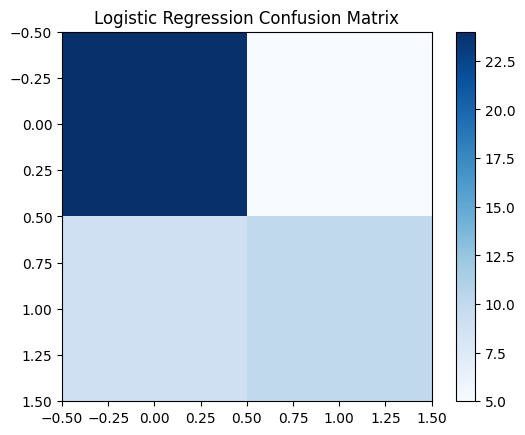

In [124]:
logr = LogisticRegression(random_state=random_state)
cv_scores = cross_val_score(logr, X_train_bedensel, y_train, cv=5)
logr.fit(X_train_bedensel, y_train)
y_pred = logr.predict(X_test_bedensel)

# Ortalama cross-validation doğruluk skorunu kaydet
logr_score = cv_scores.mean()  # 🛠 Hata buradan kaynaklanıyordu, değişken eklendi

model_scores["Logistic Regression"] = logr_score
print(f"Logistic Regression Accuracy: {logr_score:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n", cm)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.colorbar()
plt.show()

KNN (k=2) Accuracy: 0.6128205128205129
KNN (k=3) Accuracy: 0.6651821862348178
KNN (k=4) Accuracy: 0.6390013495276653
KNN (k=5) Accuracy: 0.6550607287449394
Best KNN (k=3): 0.6651821862348178


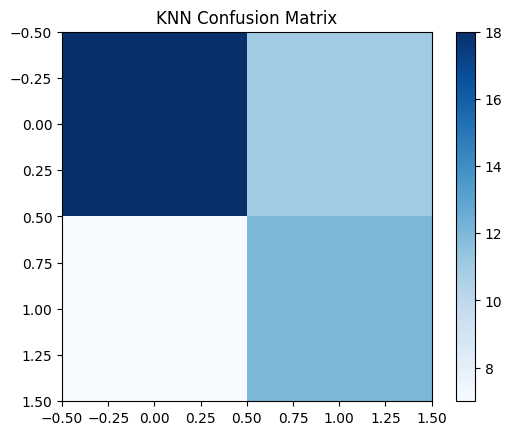

In [125]:
best_knn_score = 0
best_k = 2
for k in range(2, 6):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    cv_scores = cross_val_score(knn, X_train_bedensel, y_train, cv=5)
    knn.fit(X_train_bedensel, y_train)
    y_pred = knn.predict(X_test_bedensel)
    
    avg_score = cv_scores.mean()
    print(f'KNN (k={k}) Accuracy:', avg_score)
    
    if avg_score > best_knn_score:
        best_knn_score = avg_score
        best_k = k

# En iyi K için confusion matrix
knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski')
knn.fit(X_train_bedensel, y_train)
y_pred = knn.predict(X_test_bedensel)
cm = confusion_matrix(y_test, y_pred)
print(f'Best KNN (k={best_k}):', best_knn_score)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.colorbar()
plt.show()

SVM (kernel=rbf) Accuracy: 0.7021592442645075
SVM (kernel=linear) Accuracy: 0.7071524966261808
SVM (kernel=poly) Accuracy: 0.6284750337381917
Best SVM (kernel=linear): 0.7071524966261808


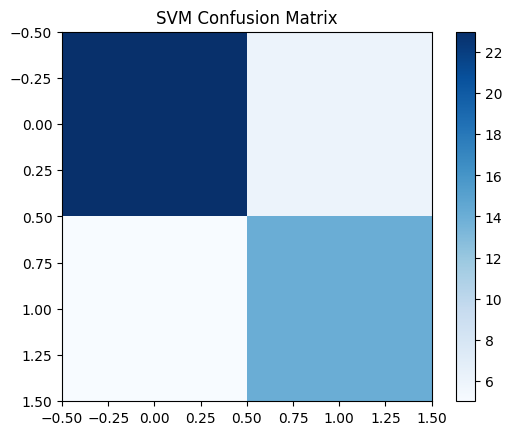

In [126]:
best_svm_score = 0
best_kernel = 'rbf'
for kernel in ['rbf', 'linear', 'poly']:
    svc = SVC(kernel=kernel)
    cv_scores = cross_val_score(svc, X_train_bedensel, y_train, cv=5)
    svc.fit(X_train_bedensel, y_train)
    y_pred = svc.predict(X_test_bedensel)
    
    avg_score = cv_scores.mean()
    print(f'SVM (kernel={kernel}) Accuracy:', avg_score)
    
    if avg_score > best_svm_score:
        best_svm_score = avg_score
        best_kernel = kernel

svc = SVC(kernel=best_kernel)
svc.fit(X_train_bedensel, y_train)
y_pred = svc.predict(X_test_bedensel)
cm = confusion_matrix(y_test, y_pred)
print(f'Best SVM (kernel={best_kernel}):', best_svm_score)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.colorbar()
plt.show()

Decision Tree (criterion=entropy) Cross-Validation Accuracy: 0.7016194331983805
Decision Tree (criterion=gini) Cross-Validation Accuracy: 0.7120107962213226
Best Decision Tree (criterion=gini): 0.7120107962213226
Confusion Matrix for Decision Tree:
 [[21  8]
 [ 5 14]]


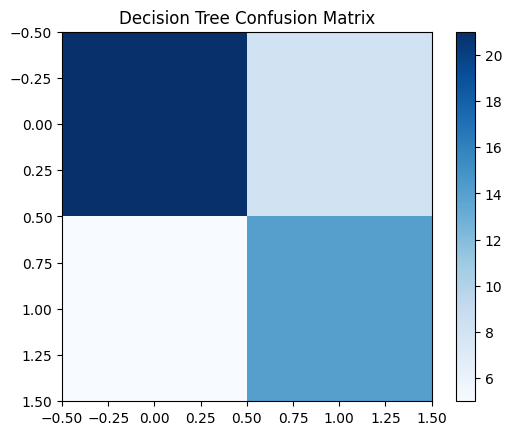

In [127]:
best_dt_score = 0
best_criterion = 'entropy'

for criterion in ['entropy', 'gini']:
    dtc = DecisionTreeClassifier(criterion=criterion, max_depth=5)
    cv_scores = cross_val_score(dtc, X_train_bedensel, y_train, cv=5)
    avg_score = cv_scores.mean()

    print(f'Decision Tree (criterion={criterion}) Cross-Validation Accuracy:', avg_score)

    if avg_score > best_dt_score:
        best_dt_score = avg_score
        best_criterion = criterion

# **En iyi modeli seç ve confusion matrix çiz**
dtc = DecisionTreeClassifier(criterion=best_criterion, max_depth=5)
dtc.fit(X_train_bedensel, y_train)
y_pred = dtc.predict(X_test_bedensel)
cm = confusion_matrix(y_test, y_pred)

print(f'Best Decision Tree (criterion={best_criterion}):', best_dt_score)
print("Confusion Matrix for Decision Tree:\n", cm)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.colorbar()
plt.show()

Random Forest (n_estimators=10, max_features=sqrt) Cross-Validation Accuracy: 0.6866396761133603
Random Forest (n_estimators=10, max_features=log2) Cross-Validation Accuracy: 0.7178137651821863
Random Forest (n_estimators=100, max_features=sqrt) Cross-Validation Accuracy: 0.7176788124156545
Random Forest (n_estimators=100, max_features=log2) Cross-Validation Accuracy: 0.7545209176788125
Random Forest (n_estimators=200, max_features=sqrt) Cross-Validation Accuracy: 0.7388663967611335
Random Forest (n_estimators=200, max_features=log2) Cross-Validation Accuracy: 0.7232118758434549
Best Random Forest (n_estimators=100, max_features=log2): 0.7545209176788125
Confusion Matrix for Random Forest:
 [[19 10]
 [ 5 14]]


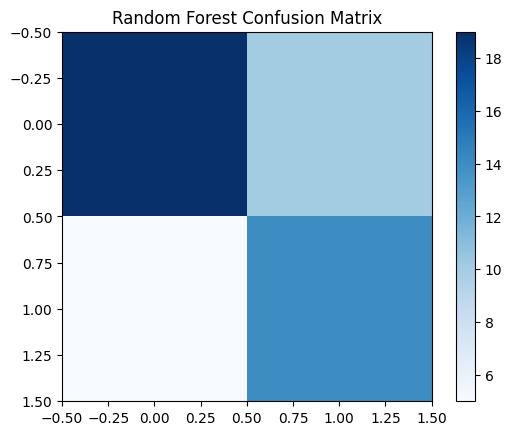

In [132]:
best_rf_score = 0
best_n_estimators = 10
best_max_features = 'sqrt'

for n_estimators in [10, 100, 200]:
    for max_features in ['sqrt', 'log2']:
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, criterion='entropy')
        cv_scores = cross_val_score(rfc, X_train_bedensel, y_train, cv=5)
        avg_score = cv_scores.mean()

        print(f'Random Forest (n_estimators={n_estimators}, max_features={max_features}) Cross-Validation Accuracy:', avg_score)

        if avg_score > best_rf_score:
            best_rf_score = avg_score
            best_n_estimators = n_estimators
            best_max_features = max_features
            

# **En iyi modeli seç ve confusion matrix çiz**
rfc = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features, criterion='entropy')
rfc.fit(X_train_bedensel, y_train)
y_pred = rfc.predict(X_test_bedensel)
cm = confusion_matrix(y_test, y_pred)

print(f'Best Random Forest (n_estimators={best_n_estimators}, max_features={best_max_features}):', best_rf_score)
print("Confusion Matrix for Random Forest:\n", cm)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.colorbar()
plt.show()

Naive Bayes Accuracy: 0.6864
Confusion Matrix for Naive Bayes:
 [[22  7]
 [ 5 14]]


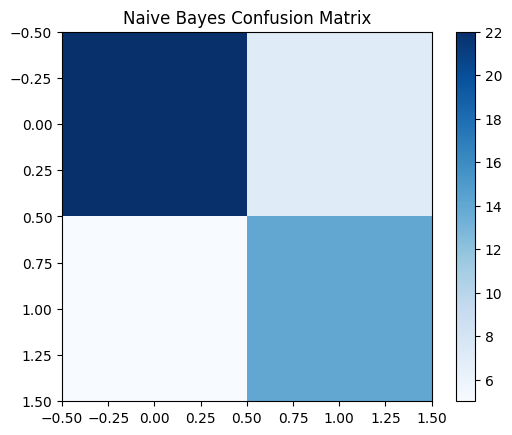

In [129]:
gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X_train_bedensel, y_train, cv=5)
gnb.fit(X_train_bedensel, y_train)
y_pred = gnb.predict(X_test_bedensel)

# Ortalama cross-validation doğruluk skorunu kaydet
gnb_score = cv_scores.mean()  # 🛠 Hata buradan kaynaklanıyordu, değişken eklendi

print(f"Naive Bayes Accuracy: {gnb_score:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.colorbar()
plt.show()

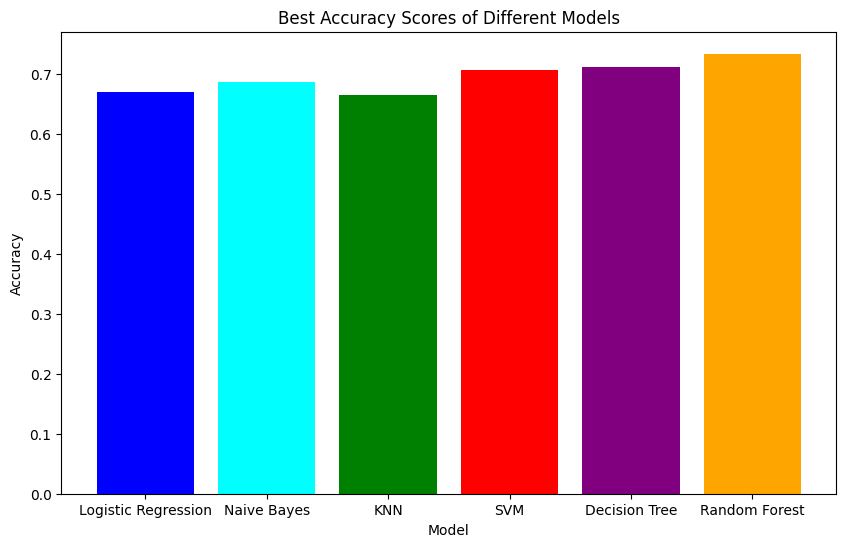

In [130]:
# En iyi modelleri karşılaştırma
overall_models = ['Logistic Regression', 'Naive Bayes', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
overall_accuracy_scores = [logr_score, gnb_score, best_knn_score, best_svm_score, best_dt_score, best_rf_score]

plt.figure(figsize=(10, 6))
plt.bar(overall_models, overall_accuracy_scores, color=['blue', 'cyan', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Best Accuracy Scores of Different Models')
plt.show()
